In [44]:
%load_ext autoreload
%autoreload 2
from perceptron import Perceptron, PerceptronOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
import torch
from matplotlib import pyplot as plt

torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.2)

def plot_perceptron_data(X, y, w, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])

    # Draw the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_values = torch.linspace(x_min, x_max, 100)
    y_values = -(w[0]*x_values + w[2])/w[1]
    ax.plot(x_values, y_values, color='black')

    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")
    plt.show()

X, y = perceptron_data()

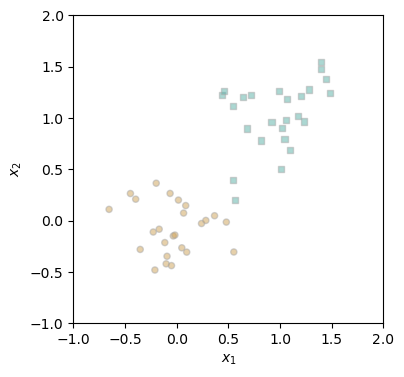

In [46]:
torch.manual_seed(1234)
X, y = perceptron_data(n_points = 50, noise = 0.3)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, [0, 0, 0], ax)

### Experiment 1
In this experiment, I will show that given linearly separable data, the perceptron algorithm will converge to a value of w that separates the data.

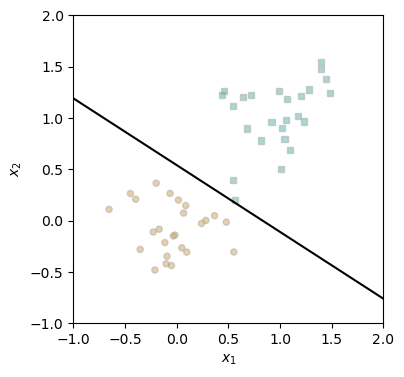

In [47]:
# instantiate a model and an optimizer
p = Perceptron() 
p.w = torch.Tensor([1, 1, 1])
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
losses = []

n = X.size()[0]

while loss > 0: # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    losses.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, p.w, ax)

Ok nice - I can see that the w (represented by the black line) successfully separates all of the yellow data points from all of the green data points. Looks like this experiment was successful.

Text(0, 0.5, 'Loss')

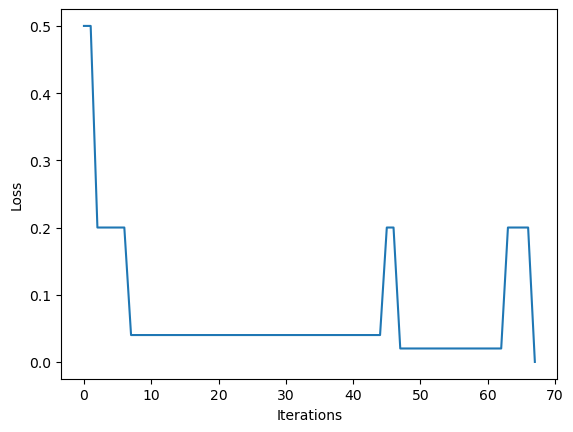

In [48]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")

And it took 70 iterations to converge. A little unlucky given that there are only 50 data points.
## Experiment 2
In this second experiment, I will show that when the data is not linearly separable, the perceptron algorithm will continue iterating until it reaches a provided maximum number of iterations (for example, through a for loop). It will never reach 0, as this isn't possible for data that isn't linearly separable, and, as such, will continue iterating until told to stop.

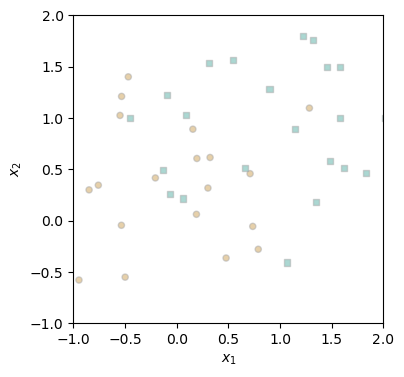

In [49]:
X, y = perceptron_data(n_points = 50, noise = 0.75)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, [0, 0, 0], ax)

Alright - we increased the noise to get some good data here. We can see visually that the data is not linearly separable, so it should serve for this experiment.

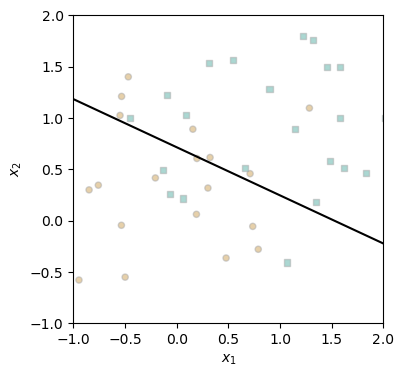

In [50]:
# instantiate a model and an optimizer
p = Perceptron() 
p.w = torch.Tensor([1, 1, 1])
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
losses = []

n = X.size()[0]

for i in range(1000): # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    losses.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, p.w, ax)

The algorithm did a pretty good job separating most of the points, but as expected, there are some outliers of each group on the wrong side of w.

Text(0, 0.5, 'Loss')

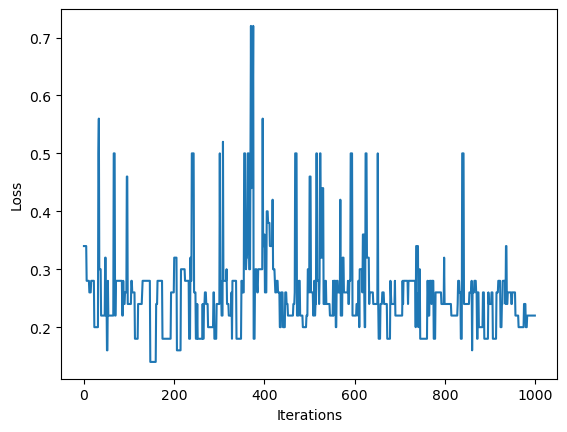

In [51]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

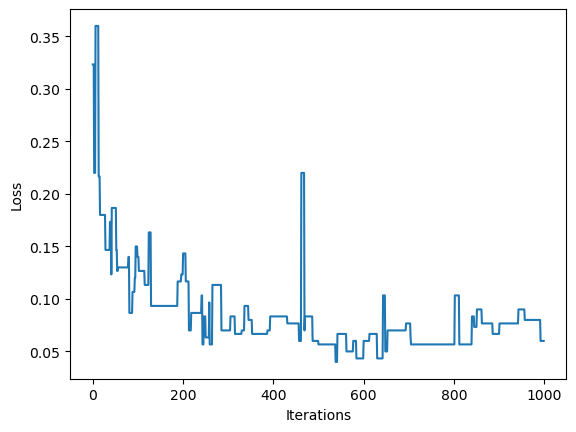

In [52]:
X, y = perceptron_data(n_points = 300, noise = 0.9, p_dims=10)

# instantiate a model and an optimizer
p = Perceptron() 
p.w = torch.rand(X.size()[1])
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
losses = []

n = X.size()[0]

for i in range(1000): # dangerous -- only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    losses.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]
    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")

In this blog post, I explored the perceptron algorithm to separate data. One important note about this algorithm is that if the data is not linearly separable, it will never converge! This means it is important to put a cap on the number of times it is run if you aren't sure the data is linearly separable. In terms of implementing the Perceptron class, the gradient function, Perceptron.grad, is incredibly important. It first computes the scores for the input data X, and then calculates exp, an expression to indicate for which instances the model made incorrect predictions. Finally, it calculates the gradient of the loss function, multiplying by X and y to decide which direction the weights must be updated to improve. Finally, it returns the mean of the gradient over the 0th dimension. The runtime complexity of a single iteration of the perceptron algorithm is O(p) where p is the number of features. This comes from the gradient function. Following this time complexity, it seems that the runtime of perceptron relies on the number of features p, but not the number of data points n.